In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from pandas.tools import plotting
from sklearn.model_selection import train_test_split
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

%matplotlin inline

Using TensorFlow backend.
UsageError: Line magic function `%matplotlin` not found.


In [2]:
#loading dataset
iris = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

In [3]:
#printing how many features?
print("the dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))

the dataset has 150 rows and 5 features


In [4]:
#visualising data
table = ff.create_table(iris.head())
py.iplot(table,filename='jupyter-table1')

In [5]:
#printing info about dataset
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


**The data types are correct and we can see that there is no null values in the dataset**

In [6]:
#printing statistics about the dataset
print(iris.describe())
#py.iplot(ff.create_table(iris.describe()),filename='describe_table')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
#printing coefficient of Quartile deviation
qd = pd.DataFrame((iris.describe().loc['75%']-iris.describe().loc['25%'])/(iris.describe().loc['75%']+iris.describe().loc['25%']),columns=['COQD'])
print(qd)

                  COQD
sepal_length  0.113043
sepal_width   0.081967
petal_length  0.522388
petal_width   0.714286


In [8]:
#how many datapoints for each class are presents?
print(iris["species"].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


In [9]:
#which categories of flowers we have?
print(" we have {} types of species in this dataset".format(iris.species.nunique()))
print("the names of this species are:",iris.species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


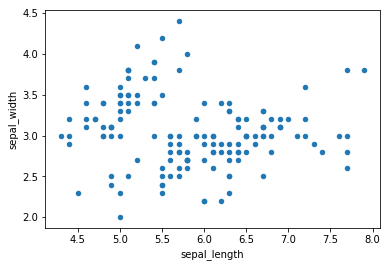

In [10]:
#2-D scatter plots
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

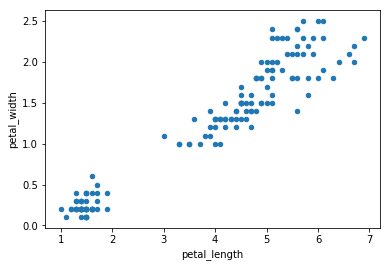

In [11]:
iris.plot(kind='scatter', x='petal_length', y='petal_width') ;
plt.show()

* cannot make much sense out it.
* What if we color the points by thier class-label/flower-type.

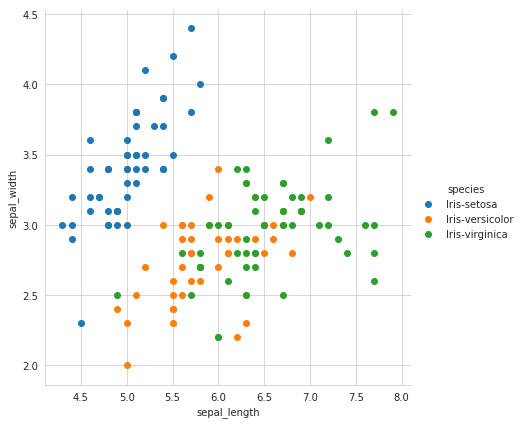

In [12]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(data=iris,hue="species",size=6)\
   .map(plt.scatter,"sepal_length","sepal_width")\
   .add_legend()
plt.show()

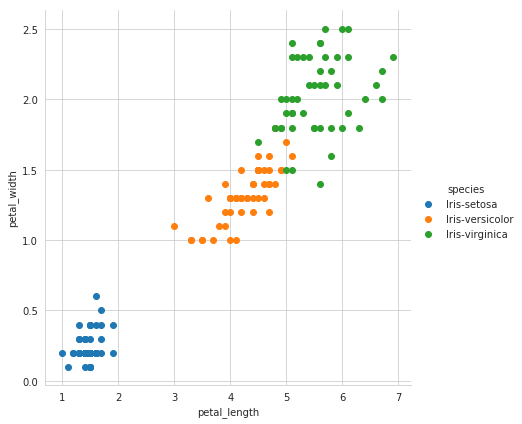

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data=iris,hue="species",size=6)\
   .map(plt.scatter,"petal_length","petal_width")\
   .add_legend()
plt.show()

* Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
* Seperating Versicolor from Viginica is much harder as they have considerable overlap.

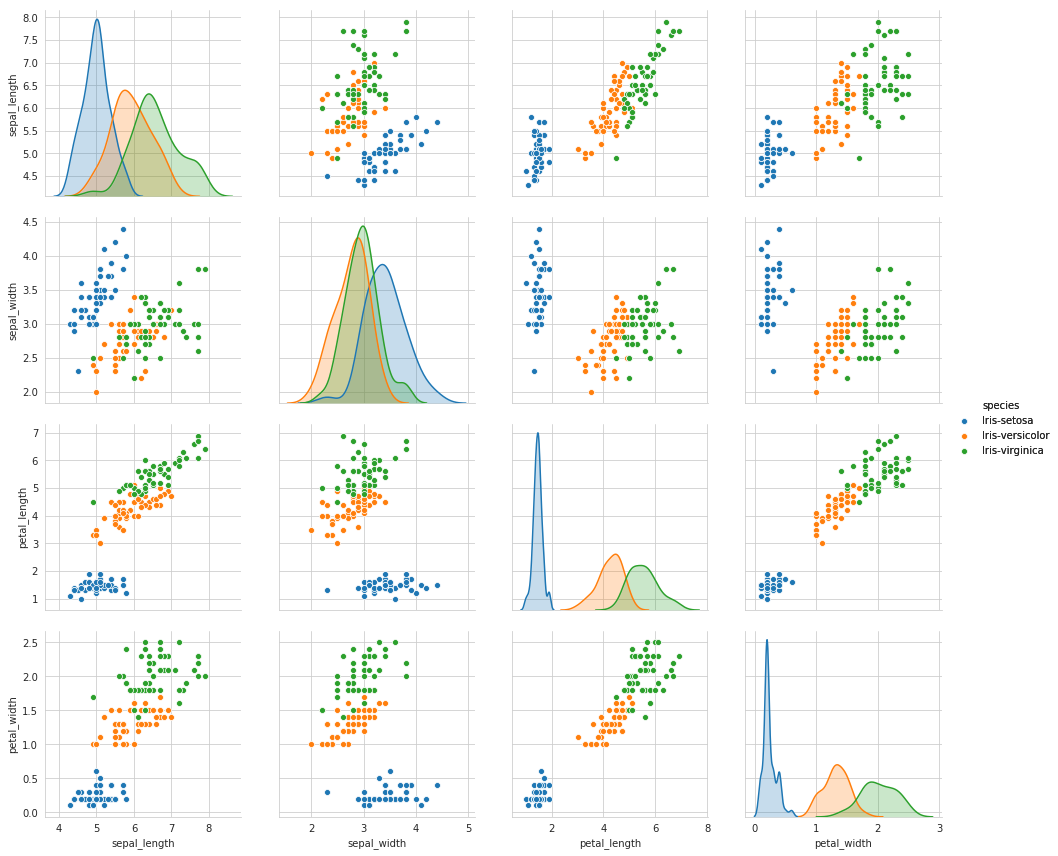

In [14]:
#pair-plot
sns.set_style("whitegrid")
sns.pairplot(data=iris,hue="species",size=3)\
   .add_legend()
plt.show()

* petal_length and petal_width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
* We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

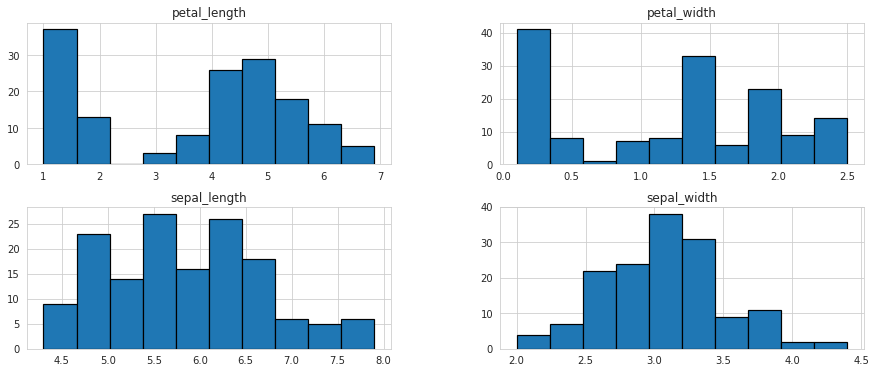

In [15]:
#histograms
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

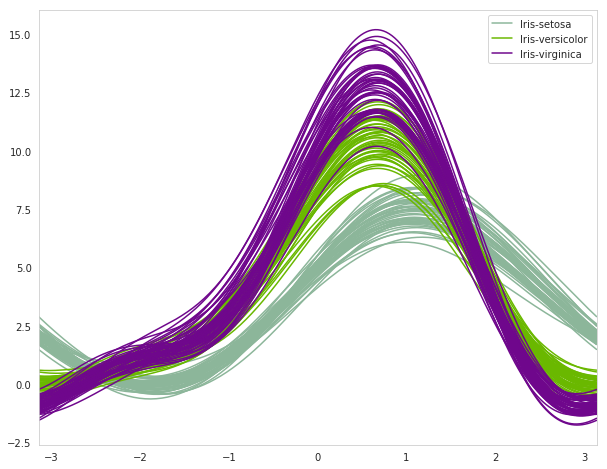

In [16]:
#Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.
#https://glowingpython.blogspot.com/2014/10/andrews-curves.html
plt.figure(figsize=(10,8))
plotting.andrews_curves(iris,'species')
#In the plot below, the each color used represents a class
#we can easily note that the lines that represent samples from the same class have similar curves.

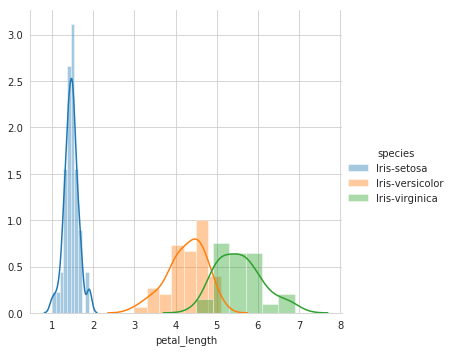

In [17]:
#distplot

sns.FacetGrid(data=iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend()
plt.show()


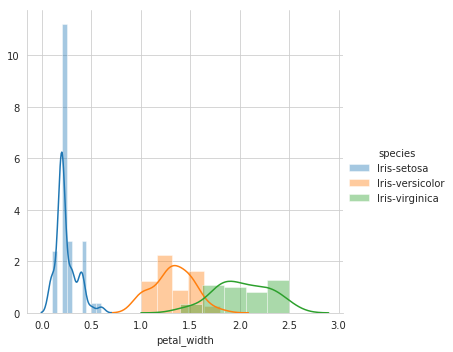

In [18]:
sns.FacetGrid(data=iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend()
plt.show()

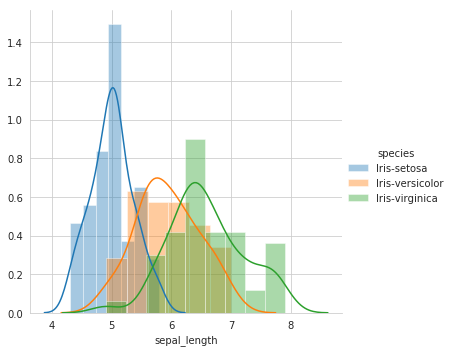

In [19]:
sns.FacetGrid(data=iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend()
plt.show()

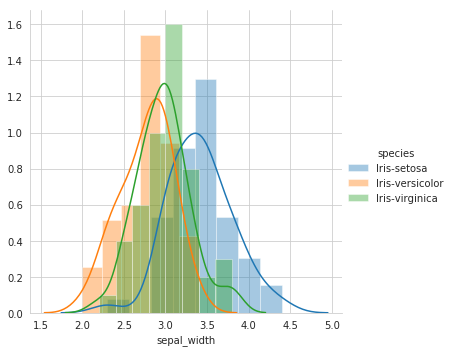

In [20]:
sns.FacetGrid(data=iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend()
plt.show()

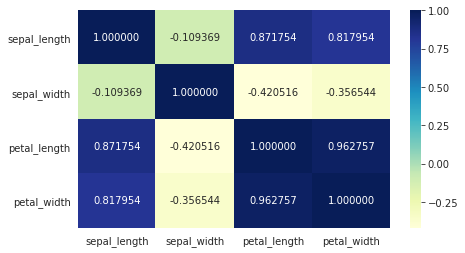

In [21]:
#Let's check if we have any correlation between features
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="YlGnBu")
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


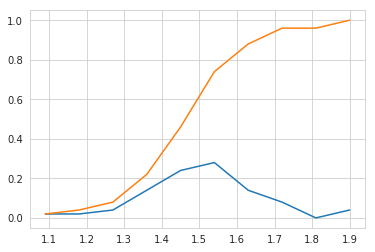

In [22]:
#Plot CDF of petal_length

iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_length'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.12 0.   0.56 0.14 0.   0.   0.14 0.   0.02 0.02]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.12 0.12 0.68 0.82 0.82 0.82 0.96 0.96 0.98 1.  ]


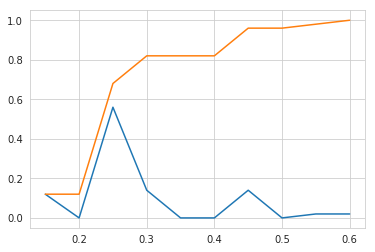

In [23]:
#Plot CDF of petal_width

iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_width'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

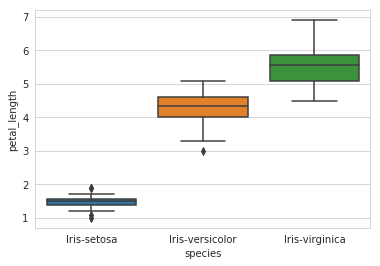

In [24]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

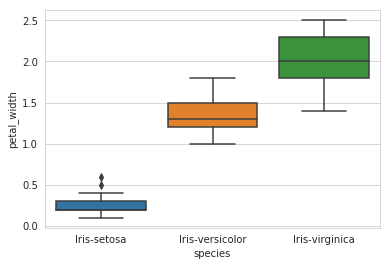

In [25]:
sns.boxplot(x='species',y='petal_width', data=iris)
plt.show()

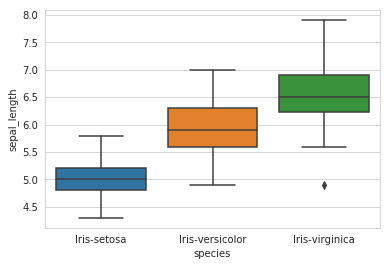

In [26]:
sns.boxplot(x='species',y='sepal_length', data=iris)
plt.show()

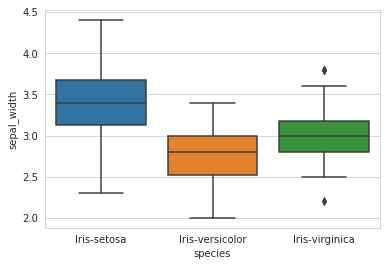

In [27]:
sns.boxplot(x='species',y='sepal_width', data=iris)
plt.show()

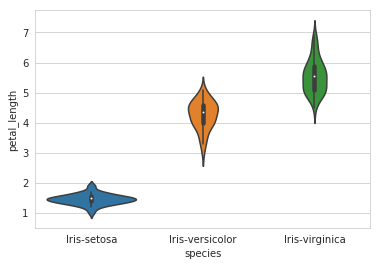

In [28]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

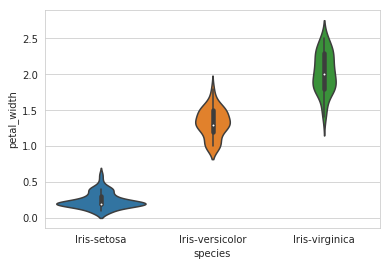

In [29]:
sns.violinplot(x="species", y="petal_width", data=iris, size=8)
plt.show()

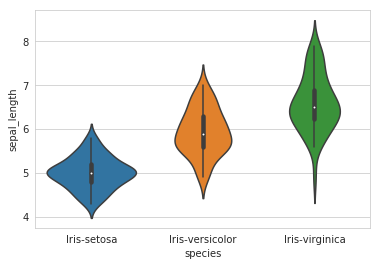

In [30]:
sns.violinplot(x="species", y="sepal_length", data=iris, size=8)
plt.show()

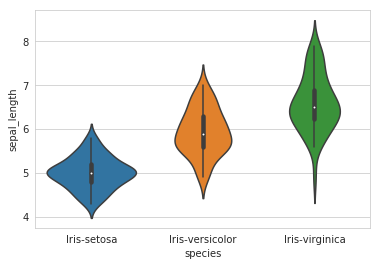

In [31]:
sns.violinplot(x="species", y="sepal_length", data=iris, size=8)
plt.show()

In [32]:
#splitting of data
X_train, X_test, y_train,y_test = train_test_split(iris.iloc[:,:4],iris.species,stratify=iris.species,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [33]:
#random samples of training data
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
23,5.1,3.3,1.7,0.5
113,5.7,2.5,5.0,2.0
89,5.5,2.5,4.0,1.3
109,7.2,3.6,6.1,2.5
123,6.3,2.7,4.9,1.8


In [34]:
#training svc model
SVC = SVC()
SVC.fit(X_train,y_train)
y_predict = SVC.predict(X_test)
print("the accuracy of the Support Vector Machine Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Support Vector Machine Classifier model is : 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [35]:
#training logistic regression
LG = LogisticRegression()
LG.fit(X_train,y_train)
y_predict = LG.predict(X_test)
print("the accuracy of the Logistic Regresssion Classifier model is :",accuracy_score(y_predict,y_test))
confusion_matrix(y_predict,y_test)

the accuracy of the Logistic Regresssion Classifier model is : 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [36]:
#training decision tree classifier model
DTC = DecisionTreeClassifier(max_leaf_nodes = 3)
DTC.fit(X_train,y_train)
y_predict = DTC.predict(X_test)
print("the accuracy of the Decision Tree Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Decision Tree Classifier model is : 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [37]:
#training extra tree classfier model
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
ETC_prediction=ETC.predict(X_test)
print('The accuracy of the Extra Trees Classifier model is',accuracy_score(ETC_prediction,y_test))
confusion_matrix(ETC_prediction,y_test)

The accuracy of the Extra Trees Classifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [38]:
#training KNN model
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_prediction=KNN.predict(X_test)
print('The accuracy of the KNeighborsClassifier model is',accuracy_score(KNN_prediction,y_test))
confusion_matrix(KNN_prediction,y_test)

The accuracy of the KNeighborsClassifier model is 0.9555555555555556


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]])

In [39]:
#training gaussian naive bayes model
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB_prediction=GNB.predict(X_test)
print('The accuracy of the GaussionNB model is',accuracy_score(GNB_prediction,y_test))
confusion_matrix(GNB_prediction,y_test)

The accuracy of the GaussionNB model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 14]])

In [40]:
#training random forest classfier model
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_prediction=RFC.predict(X_test)
print('The accuracy of the RandomForestClassifier model is',accuracy_score(RFC_prediction,y_test))
confusion_matrix(RFC_prediction,y_test)

The accuracy of the RandomForestClassifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [41]:
#training XGboost model
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
XGB_prediction=XGB.predict(X_test)
print('The accuracy of the XGBClassifier model is',accuracy_score(XGB_prediction,y_test))
confusion_matrix(XGB_prediction,y_test)

The accuracy of the XGBClassifier model is 0.9333333333333333


array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]])

In [42]:
#lets try to build a Deep learning model with keras
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris["species"]

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
model = Sequential()
model.add(Dense( 4, input_dim=4, activation = 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
model_training = model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/150
105/105 [==============================] - 0s 4ms/step - loss: 0.8113 - acc: 0.5365 - val_loss: 0.7748 - val_acc: 0.5630
Epoch 2/150
105/105 [==============================] - 0s 123us/step - loss: 0.7941 - acc: 0.5524 - val_loss: 0.7611 - val_acc: 0.5778
Epoch 3/150
105/105 [==============================] - 0s 95us/step - loss: 0.7771 - acc: 0.5587 - val_loss: 0.7479 - val_acc: 0.5926
Epoch 4/150
105/105 [==============================] - 0s 93us/step - loss: 0.7603 - acc: 0.5683 - val_loss: 0.7352 - val_acc: 0.6222
Epoch 5/150
105/105 [==============================] - 0s 89us/step - loss: 0.7432 - acc: 0.6127 - val_loss: 0.7231 - val_acc: 0.6444
Epoch 6/150
105/105 [==============================] - 0s 110us/step - loss: 0.7279 - acc: 0.6381 - val_loss: 0.7113 - val_acc: 0.6667
Epoch 7/150
105/105 [==============================] - 0s 98us/step - loss: 0.7139 - acc: 0.6444 - val_loss: 0.6997 - val_acc: 0.6667
Epoch 8/150
105/

105/105 [==============================] - 0s 90us/step - loss: 0.3480 - acc: 0.8286 - val_loss: 0.3957 - val_acc: 0.7704
Epoch 62/150
105/105 [==============================] - 0s 86us/step - loss: 0.3457 - acc: 0.8286 - val_loss: 0.3935 - val_acc: 0.7704
Epoch 63/150
105/105 [==============================] - 0s 87us/step - loss: 0.3438 - acc: 0.8317 - val_loss: 0.3914 - val_acc: 0.7704
Epoch 64/150
105/105 [==============================] - 0s 81us/step - loss: 0.3418 - acc: 0.8317 - val_loss: 0.3893 - val_acc: 0.7704
Epoch 65/150
105/105 [==============================] - 0s 91us/step - loss: 0.3400 - acc: 0.8317 - val_loss: 0.3871 - val_acc: 0.7704
Epoch 66/150
105/105 [==============================] - 0s 90us/step - loss: 0.3382 - acc: 0.8317 - val_loss: 0.3851 - val_acc: 0.7704
Epoch 67/150
105/105 [==============================] - 0s 79us/step - loss: 0.3365 - acc: 0.8317 - val_loss: 0.3834 - val_acc: 0.7704
Epoch 68/150
105/105 [==============================] - 0s 80us/step

105/105 [==============================] - 0s 84us/step - loss: 0.2778 - acc: 0.8444 - val_loss: 0.3265 - val_acc: 0.7704
Epoch 122/150
105/105 [==============================] - 0s 94us/step - loss: 0.2770 - acc: 0.8444 - val_loss: 0.3260 - val_acc: 0.7704
Epoch 123/150
105/105 [==============================] - 0s 95us/step - loss: 0.2762 - acc: 0.8444 - val_loss: 0.3252 - val_acc: 0.7704
Epoch 124/150
105/105 [==============================] - 0s 91us/step - loss: 0.2753 - acc: 0.8444 - val_loss: 0.3245 - val_acc: 0.7704
Epoch 125/150
105/105 [==============================] - 0s 87us/step - loss: 0.2745 - acc: 0.8444 - val_loss: 0.3232 - val_acc: 0.7704
Epoch 126/150
105/105 [==============================] - 0s 87us/step - loss: 0.2735 - acc: 0.8444 - val_loss: 0.3212 - val_acc: 0.7704
Epoch 127/150
105/105 [==============================] - 0s 89us/step - loss: 0.2726 - acc: 0.8444 - val_loss: 0.3194 - val_acc: 0.7704
Epoch 128/150
105/105 [==============================] - 0s 86